In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import to_categorical
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def encode(labels):
    return to_categorical(labels)

In [4]:
def decode(labels):
    return np.argmax(labels, axis=1)

In [5]:
def plot_metrics(history):
    keys = list(history.keys())
    num_metrics = len(keys)
    fig, axs = plt.subplots(num_metrics, 1, figsize=(5, 5*num_metrics))
    fig.subplots_adjust(hspace=0.2)
    for i, key in enumerate(keys):
        y = history[key]
        x = range(len(y))
        axs[i].plot(x, y)
        axs[i].set(ylabel=key)
        axs[i].set_xticks(x)
        yticks = np.arange(min(y), max(y), 0.1)
        axs[i].set_yticks(yticks)
    plt.xlabel('Epochs')
    

In [6]:
train_path = '/Users/diegoeduardo/Desktop/Coral Reef Data/annotated images/train'
valid_path = '/Users/diegoeduardo/Desktop/Coral Reef Data/annotated images/valid'
test_path = '/Users/diegoeduardo/Desktop/Coral Reef Data/annotated images/test'

classes = ['45', '67', '59', '400', '54', '71', '64', '68', '65', '241', '253', '245', '2', '127', '28', '16', '27','22', '26', '33', '166']

In [7]:
classes = ['239', '150', '64']

In [8]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=classes, batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=classes, batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=classes, batch_size=100)

Found 2303 images belonging to 3 classes.
Found 492 images belonging to 3 classes.
Found 493 images belonging to 3 classes.


In [9]:
vgg16_model_temp = keras.applications.vgg16.VGG16()
vgg16_model = Sequential()
for layer in vgg16_model_temp.layers:
    vgg16_model.add(layer)
vgg16_model.layers.pop()
for layer in vgg16_model.layers:
    layer.trainable = False
vgg16_model.add(Dense(len(classes), activation='softmax'))

In [10]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
learning_rate = 1e-3
steps_per_epoch = 15
epochs = 10
vgg16_model.compile(Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
history = vgg16_model.fit_generator(train_batches, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=valid_batches, verbose=1)


Epoch 1/10
15/15 [==============================] - 242s 16s/step - loss: 1.0762 - acc: 0.5267 - val_loss: 1.0543 - val_acc: 0.6809
Epoch 2/10
15/15 [==============================] - 236s 16s/step - loss: 1.0526 - acc: 0.6511 - val_loss: 1.0305 - val_acc: 0.8293
Epoch 3/10
15/15 [==============================] - 239s 16s/step - loss: 1.0235 - acc: 0.8333 - val_loss: 1.0076 - val_acc: 0.8638
Epoch 4/10
15/15 [==============================] - 238s 16s/step - loss: 1.0011 - acc: 0.8267 - val_loss: 0.9915 - val_acc: 0.8638
Epoch 5/10
15/15 [==============================] - 239s 16s/step - loss: 0.9897 - acc: 0.8333 - val_loss: 0.9732 - val_acc: 0.8740
Epoch 6/10
15/15 [==============================] - 240s 16s/step - loss: 0.9735 - acc: 0.8267 - val_loss: 0.9546 - val_acc: 0.8740
Epoch 7/10
15/15 [==============================] - 239s 16s/step - loss: 0.9473 - acc: 0.9067 - val_loss: 0.9449 - val_acc: 0.8557
Epoch 8/10
15/15 [==============================] - 238s 16s/step - loss: 0.

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.14285714 0.80952381 0.04761905]
 [0.02173913 0.         0.97826087]]


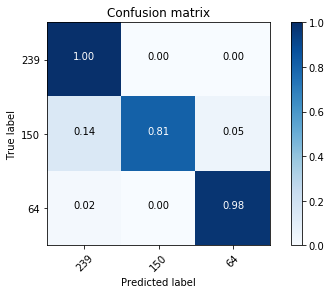

In [12]:
test_imgs, test_labels = next(test_batches)
test_labels = decode(test_labels)
predictions = vgg16_model.predict_generator(test_batches, steps=1, verbose=0)
predictions = decode(predictions)
cm = confusion_matrix(test_labels, predictions)
cm_plot_labels = classes
plot_confusion_matrix(cm, cm_plot_labels, normalize=True, title='Confusion matrix')

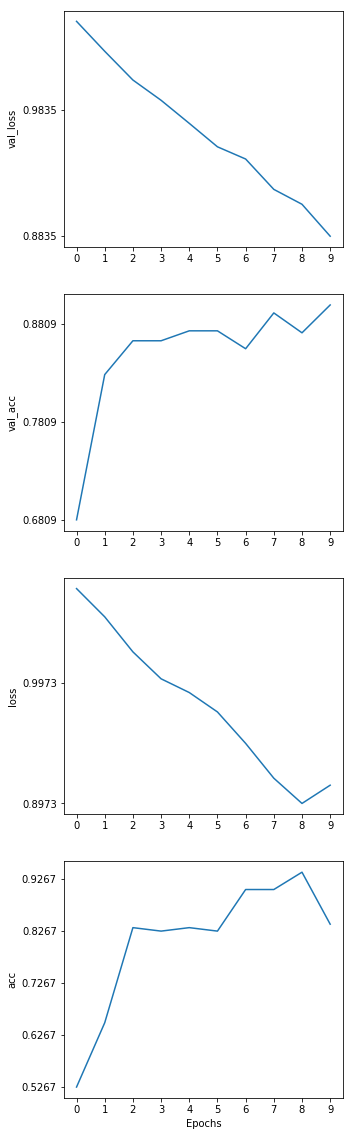

In [13]:
plot_metrics(history.history)

In [14]:
keras.__version__

'2.1.6'